<a href="https://colab.research.google.com/github/PedroAlves7/EvolucaoDiferencial/blob/main/3varEvolu%C3%A7%C3%A3o_diferencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84833834833456, 4.455878423421163, 1.8053501764179922]
Valor de fitness: 491.7834171025383

Melhor vetor: [9.84

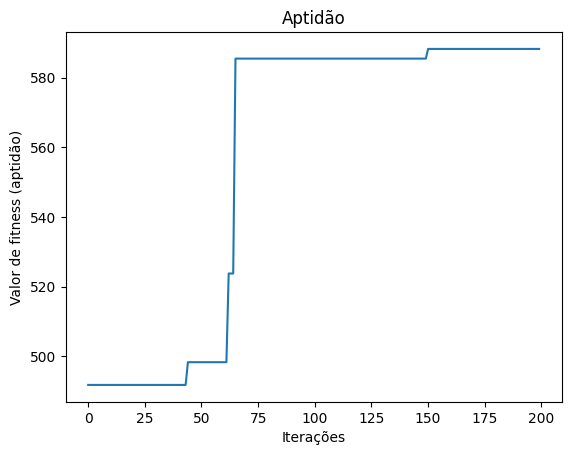

In [ ]:
import random
import matplotlib.pyplot as plt

TAM_POPULACAO = 100
NUM_GERACOES = 200
F = 0.8
CR = 0.01

# Define os limites máximos e mínimos para cada posição do vetor
limites_superiores = [10, 5, 2]
limites_inferiores = [1, 0.5, 0.1]


def gera_vetor():
  vetor = [random.uniform(limites_inferiores[0],limites_superiores[0]), random.uniform(limites_inferiores[1],limites_superiores[1]),random.uniform(limites_inferiores[2],limites_superiores[2])]
  return vetor

def populacao(num):
  pop = []
  for i in range(num):
    pop.append(gera_vetor())
  return pop


def aptidao(tentativa):
  return (100*tentativa[0]*tentativa[1]*tentativa[2])/(tentativa[0]+tentativa[1]+tentativa[2])


def seleciona3(parental,populacao):
  p2 = []
  tres_vetores = []
  for v in populacao:
    if parental != v:
      p2.append(v)
  for j in range(3):
    aleatorio = random.choice(p2)
    tres_vetores.append(aleatorio)
    p2.remove(aleatorio)
  return tres_vetores

def mutacao_vetor(vetorParental, tres, CR, F, limites_superiores, limites_inferiores):
    i = 0
    A = tres[0]
    B = tres[1]
    C = tres[2]
    tentativa = []
    while i < len(vetorParental):
        R = random.random()
        if R < CR:
            X = A[i] + F*(B[i]-C[i])
            X = max(min(X, limites_superiores[i]), limites_inferiores[i])
            tentativa.append(X)
        else:
            tentativa.append(vetorParental[i])
        i += 1
    return tentativa


def melhorVetor(pop):
  notas = []
  for i in pop:
    notas.append(aptidao(i))
  indice = notas.index(max(notas))
  return pop[indice]

population = populacao(TAM_POPULACAO)
melhores = []

for i in range(NUM_GERACOES):
  for j in population:
    tres = seleciona3(j,population)
    trial = mutacao_vetor(j,tres, CR, F, limites_superiores, limites_inferiores)
    if aptidao(trial) > aptidao(j):
      population.remove(j)
      population.append(trial)
  print(f'Melhor vetor: {melhorVetor(population)}')
  print(f'Valor de fitness: {aptidao(melhorVetor(population))}')
  melhores.append(aptidao(melhorVetor(population)))
  print()

plt.plot(melhores)
plt.title('Aptidão')
plt.xlabel('Iterações')
plt.ylabel('Valor de fitness (aptidão)')
plt.show()